In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

Error with date o.D. [27.08.]: invalid literal for int() with base 10: 'o.D.'
Error with date o.D. [Dienstag]: invalid literal for int() with base 10: 'o.D.'
Error with date 29.02.192: invalid literal for int() with base 10: '29.0'


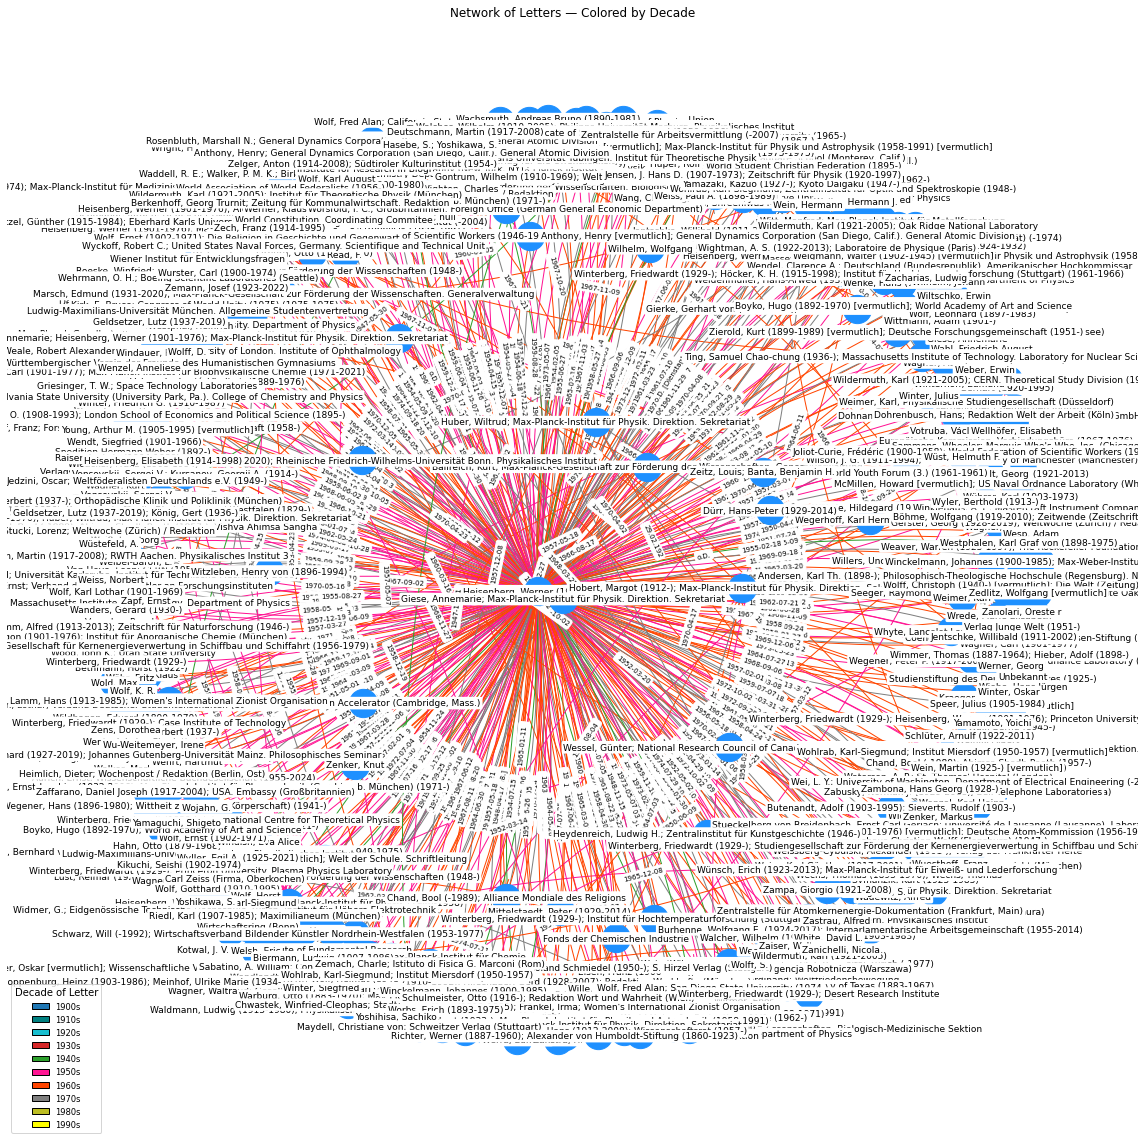

In [3]:


# Function to extract color based on decade
#def get_decade_color(date_str):
    #try:
        # Extract the year from the date string (YYYY-MM-DD)
      #  year = int(date_str[:4])  # Get the first 4 characters for the year
       # decade = (year // 10) * 10  # e.g., 1961 -> 1960
       # return decade_color_map.get(decade, 'gray')  # Default to gray if decade not in map
   # except Exception as e:
     #   print(f"Error with date {date_str}: {e}")
      #  return 'gray'
        
        
# Function to extract color based on decade
def get_decade_color(date_str):
    if date_str in ['o.D.', '']:  # Handle missing or "o.D." dates
        return 'gray'  # Use gray for undefined dates
    try:
        # Extract the year from the date string (YYYY-MM-DD)
        year = int(date_str[:4])  # Get the first 4 characters for the year
        decade = (year // 10) * 10  # e.g., 1961 -> 1960
        return decade_color_map.get(decade, 'gray')  # Default to gray if decade not in map
    except Exception as e:
        print(f"Error with date {date_str}: {e}")
        return 'gray'


# Decade color map (customizable)
decade_color_map = {
    1900: '#1f77b4',  # blue
    1910: '#008080',  # Teal
    1920: '#17becf',  # cyan
    1930: '#d62728',  # red
    1940: '#2ca02c',  # green  
    1950: '#FF1493',  # DeepPink
    1960: '#FF4500',  # OrangeRed
    1970: '#7f7f7f',  # gray
    1980: '#bcbd22',  # yellow-green
    1990: '#FFFF00',  # yellow
}

# Read the data
df = pd.read_csv('heisenberg_namesdates_upscale.csv', sep=';')
senders = df['senders'].tolist()
receivers = df['receivers'].tolist()
dates = df['date'].tolist()

# Create directed graph
G = nx.DiGraph()

# Add nodes and edges with date info
for i in range(len(senders)):
    date_str = str(dates[i])  # Ensure it is a string
    G.add_node(senders[i])
    G.add_node(receivers[i])
    G.add_edge(senders[i], receivers[i], date=date_str)

# Prepare plot
plt.figure(figsize=(16, 16))
pos = nx.spring_layout(G, seed=42, k=0.8)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='dodgerblue', node_size=800)

# Edge colors by decade
edge_colors = []
for _, _, data in G.edges(data=True):
    date_str = data.get('date', '')
    color = get_decade_color(date_str)
    edge_colors.append(color)

# Draw edges with the decade-based colors
nx.draw_networkx_edges(
    G,
    pos,
    edge_color=edge_colors,
    arrows=True,
    arrowstyle='->',
    arrowsize=20,
    connectionstyle='arc3,rad=0.1'
)

# Draw labels on nodes
nx.draw_networkx_labels(
    G,
    pos,
    font_size=9,
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2')
)

# Draw edge labels (dates)
edge_labels = nx.get_edge_attributes(G, 'date')
nx.draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=edge_labels,
    font_size=7,
    label_pos=0.5
)

# Add the legend for decades
legend_elements = [
    Patch(facecolor=color, edgecolor='black', label=f"{decade}s")
    for decade, color in sorted(decade_color_map.items())
]

plt.legend(
    handles=legend_elements,
    title="Decade of Letter",
    loc='lower left',
    fontsize='small',
    title_fontsize='medium',
    frameon=True
)

plt.title("Network of Letters — Colored by Decade")
plt.axis('off')
plt.tight_layout()
# Save the graph as a PNG file (before plt.show())
plt.savefig("network_of_letters.png", format="PNG", dpi=300, bbox_inches='tight')


plt.show()
